In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io

#Первое задание

In [ ]:
# для парса изображений из гита
def get_image_array(directory):

  arr = []

  i = 1
  while True:

      if i < 10:
        img_name = f"image_000{i}.jpg"
      elif i>=10 and i<100:
        img_name = f"image_00{i}.jpg"
      elif i>=100 and i<1000:
        img_name = f"image_0{i}.jpg"
      elif i>=1000 and i<10000:
        img_name = f"image_{i}.jpg"

      img_link = directory + img_name


      
      try:
          arr.append( io.imread(img_link))
      except:
        break

      i += 1

  return arr

In [ ]:
def show_image_array(img_list, figsize = (10, 10), rows = 3, colums = 4):
  
  plt.figure(figsize=(10, 10))
  
  for image_pos in range(len(img_list)):
    plt.subplot( colums, rows, image_pos+1 )
    plt.imshow( img_list[image_pos] )

  plt.show()

In [ ]:
directory = "https://raw.githubusercontent.com/mosolab/DIP/master/assignments/dataset/"

img_list = get_image_array(directory)

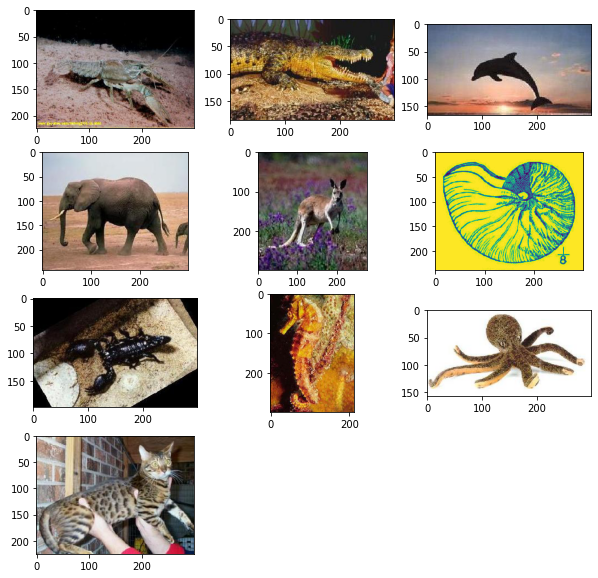

In [ ]:
show_image_array(img_list)

In [ ]:
def data_augmentation (img_list):
  rez = []
  s = np.arange(0, 255, 1)
  gamma = 0.7
  c = 1
  kernel3 = np.ones((3,3), np.float32) / (3 * 3)
  angle = 20
  scale = 1.2


  for i in range( len(img_list)):
    img_current = img_list[i]

    img_current = ~img_current

    img_current = c * np.power(img_current, gamma)
    img_current = (img_current / np.max(img_current)*255).astype(np.uint8)

    img_current = cv2.filter2D(img_current, -1, kernel3)

    height = img_current.shape[0]
    width = img_current.shape[1] 
    
    
    dst = cv2.getRotationMatrix2D( (width/2, height/2), angle, scale)
    img_current = cv2.warpAffine(img_current, dst, (width, height))

    rez.append(img_current)


  return rez

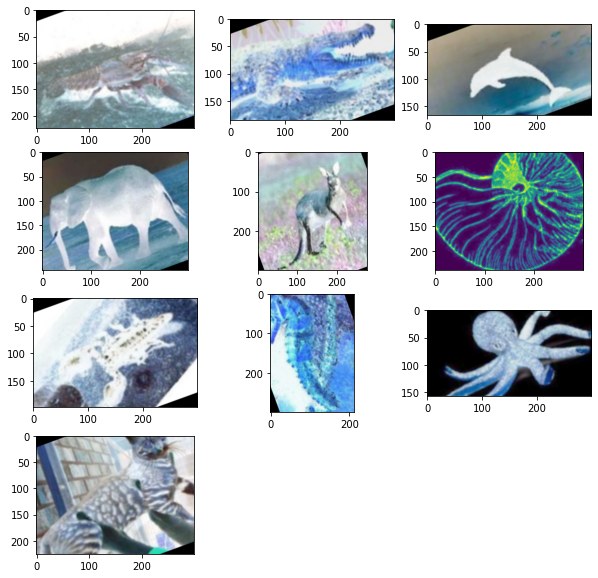

In [ ]:
img_list_augmented = data_augmentation(img_list)
show_image_array(img_list_augmented)

In [ ]:
def write_img_array (arr, directory):
  for i in range(1,len(arr)+1):

      if i < 10:
        img_name = f"image_000{i}.jpg"
      elif i>=10 and i<100:
        img_name = f"image_00{i}.jpg"
      elif i>=100 and i<1000:
        img_name = f"image_0{i}.jpg"
      elif i>=1000 and i<10000:
        img_name = f"image_{i}.jpg"

      cv2.imwrite( directory+img_name , arr[i-1])
      print("."*i)


In [ ]:
save_directory="./assignemnts/dataset/"
write_img_array(img_list_augmented,save_directory)

.
..
...
....
.....
......
.......
........
.........
..........





```

#Второе задание

In [ ]:
url_img = "https://raw.githubusercontent.com/mosolab/DIP/master/assignments/test_img.jpg"
img_BGR = io.imread(url_img)
img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB) 

In [ ]:
OUT_IMG_WIDTH = 500
OUT_IMG_HEIGHT = 500

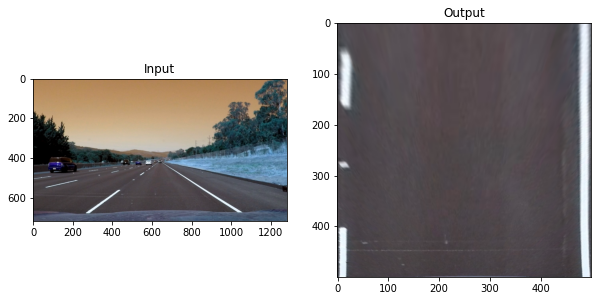

In [ ]:
src = np.float32([[560, 470],[725, 470],...
                  [1050,670],[270, 670]])

dst = np.float32([[0,0],[OUT_IMG_WIDTH,0],...
                  [OUT_IMG_WIDTH,OUT_IMG_HEIGHT],[0,OUT_IMG_HEIGHT]])

M = cv2.getPerspectiveTransform(src, dst)

out = cv2.warpPerspective(img, M, (OUT_IMG_WIDTH,OUT_IMG_HEIGHT))

plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(out),plt.title('Output')
plt.show()